In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

face_cascade = cv.CascadeClassifier("./haarcascade_frontalface_default.xml")

In [2]:
def find_wrinkles(photo_link):
    img = cv.imread(photo_link)
    img = cv.resize(img,(500,500))
    #converting into grayscale image
    gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    #search the coordinates of an image
    faces = face_cascade.detectMultiScale(gray_img,scaleFactor = 1.05,minNeighbors=10)
    for x,y,w,h in faces:
        cropped_img = img[y:y+h,x:x+w]
        edges = cv.Canny(cropped_img,110,600)        
        number_of_edges = sum(sum(edges))
        
    img = cv.imread(photo_link)
    plt.subplot(131),plt.imshow(img,cmap = 'gray')
    plt.title('Converted Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(cropped_img,cmap = 'gray')
    plt.title('Cropped Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    if number_of_edges > 50000:
        return plt.show(), print(f"Wrinkles Found: Number of edges: {number_of_edges}")
    else:
        return plt.show(), print(f"No Wrinkles Found: Number of edges: {number_of_edges}")

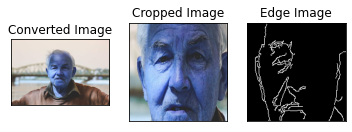

No Wrinkles Found: Number of edges: 27096


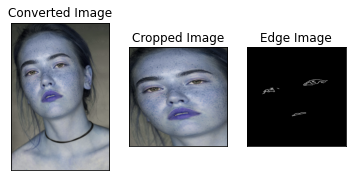

No Wrinkles Found: Number of edges: 41965


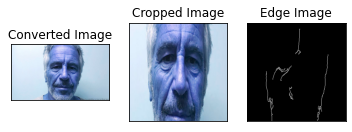

No Wrinkles Found: Number of edges: 34102


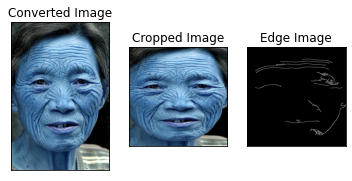

Wrinkles Found: Number of edges: 97161


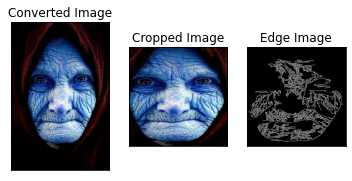

Wrinkles Found: Number of edges: 72513


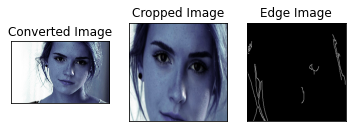

No Wrinkles Found: Number of edges: 34829


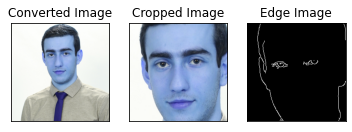

No Wrinkles Found: Number of edges: 29464


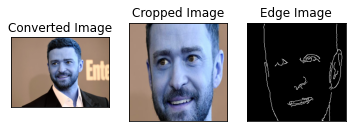

No Wrinkles Found: Number of edges: 45114


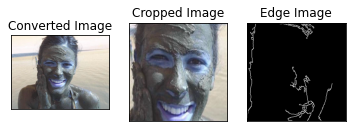

No Wrinkles Found: Number of edges: 33900


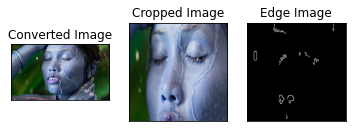

No Wrinkles Found: Number of edges: 23045


In [3]:
for photo in ["./photo{}.jpg".format(i) for i in range(10)]:
    find_wrinkles(photo)